# This notebook demonstrates how to load in the lens catalogues and make some summary plots

In [2]:
"""
This notebook requires a conda environment, which can be set up with the following (also outlined in README):

conda create --name ssl-legacysurvey python=3.8 matplotlib numpy ipykernel h5py pandas python-wget

conda activate ssl-legacysurvey

python -m ipykernel install --user --name ssl-legacysurvey --display-name ssl-legacysurvey
"""

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patheffects as PathEffects

import pandas as pd
import h5py
import os
import glob 

from pathlib import Path

import src.plotting_tools as plt_tools
import src.utils as utils

#--- Figure aesthetics ---
fs = 16
plt.rcParams.update({'font.size': fs,                                                                                                                                                    
                   'axes.labelsize': fs, 'legend.fontsize': fs, 
                     'xtick.labelsize': fs, 'ytick.labelsize': fs, 
                     'axes.linewidth': 1.0})                                                                                                                                                                    

data_dir = 'data/'
data_host_url = 'https://portal.nersc.gov/project/cusp/ssl_galaxy_surveys/strong_lens_data/'

utils.list_files(data_dir)

data/ structure and files:
/
    new_lenses.h5
    training_lenses.tsv
    new_lenses.tsv
    training_lenses.h5
network_predictions/
    linear_predictions_south_mag20-21.h5
    linear_predictions_south.tsv
    linear_predictions_south_mag20-21.tsv
    finetuned_predictions_south_mag20-21.tsv
    finetuned_predictions_north.h5
    finetuned_predictions_south.tsv
    finetuned_predictions_north.tsv
    finetuned_predictions_south.h5
    linear_predictions_north.h5
    finetuned_predictions_south_mag20-21.h5
    linear_predictions_south.h5
    linear_predictions_north.tsv
single_region/
    south_a.h5
    south_a.tsv
    north_b.h5
    north_a.h5
    north_a.tsv
    south_mag20-21_b.tsv
    south_b.h5
    south_mag20-21_a.h5
    south_mag20-21_a.tsv
    south_mag20-21_b.h5
    south_b.tsv
    north_b.tsv


## Load in new lens candidate info from tsv and display

In [2]:
file_in = 'new_lenses.tsv'
df = pd.read_csv(os.path.join(data_dir, file_in), sep='\t')
df

ra        dec source_type       ebv     z_spec  z_phot_mean  \
0      79.979720 -31.818330         SER  0.019891 -99.000000     0.165036   
1     248.469440  24.583313         SER  0.038458   0.193712     0.191553   
2     218.485170  29.430159         SER  0.015636 -99.000000     0.203784   
3     252.375380   0.296634         SER  0.154523 -99.000000     0.179597   
4     172.595930  -6.876152         SER  0.037420 -99.000000     0.191909   
...          ...        ...         ...       ...        ...          ...   
1187  226.975970  11.815690         DEV  0.034990 -99.000000     0.611945   
1188   65.863380 -58.280853         EXP  0.017114 -99.000000     0.961779   
1189   12.536311 -46.155540         REX  0.011655 -99.000000     0.321200   
1190  208.123230  12.910252         DEV  0.022726 -99.000000     0.860356   
1191   54.045547 -20.563307         REX  0.027056 -99.000000     0.838339   

      z_phot_l68  z_phot_u68      mag_g      mag_r      mag_z  nobs_g  nobs_r  \
0       0.158872    0.169722  16.836323  15.691679  14.951492       6       6   
1       0.184483    0.197265  17.313475  16.066175  15.283656       2       3   
2       0.200158    0.207839  17.379465  16.082985  15.313526       3       3   
3       0.174585    0.184597  17.664028  16.277971  15.344766       2       1   
4       0.189114    0.194677  17.475700  16.195793  15.414865       2       2   
...          ...         ...        ...        ...        ...     ...     ...   
1187    0.453244    0.734232  24.667444  21.987108  20.361502       2       2   
1188    0.868781    1.100713  23.095194  22.016650  20.366964       9       8   
1189    0.252733    0.392034  22.529833  21.169878  20.370180       8       9   
1190    0.821115    0.898173  24.605925  22.311756  20.370930       4       4   
1191    0.796508    0.883349  23.823850  22.139503  20.371340       9       8   

      nobs_z      inds region grade  
0          6    114223  south     A  
1          4    190663  south     B  
2          3    195033  south     B  
3          1    252582  south     B  
4          3    226795  south     A  
...      ...       ...    ...   ...  
1187       2  18711795  south     A  
1188       8  19044379  south     A  
1189       9  19240918  south     A  
1190       5  19287274  south     B  
1191       9  19312370  south     B  

[1192 rows x 17 columns]

In [3]:
# number of new lens candidates in each region, split by grade

regions = np.unique(df['region'])
grades = np.unique(df['grade'])

for region in regions:
    for grade in grades:
        nlens = np.sum( (df['region'] == region) & (df['grade'] == grade))
        print(f'Region = {region}, Grade = {grade}, Nlens = {nlens}')
  
nlens_total = len(df['grade'])
print(f'\nTotal = {nlens_total}')

Region = north, Grade = A, Nlens = 41
Region = north, Grade = B, Nlens = 74
Region = south, Grade = A, Nlens = 363
Region = south, Grade = B, Nlens = 714

Total = 1192


## Make a few summary plots

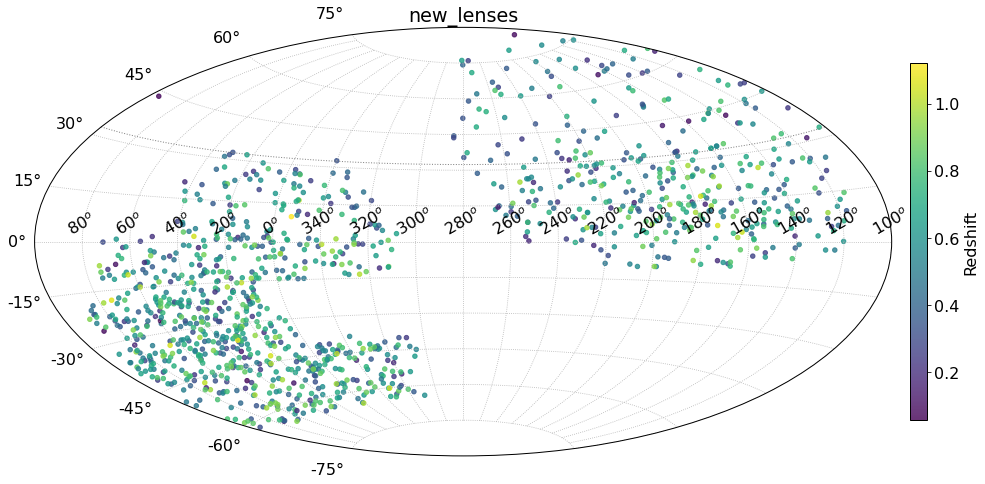

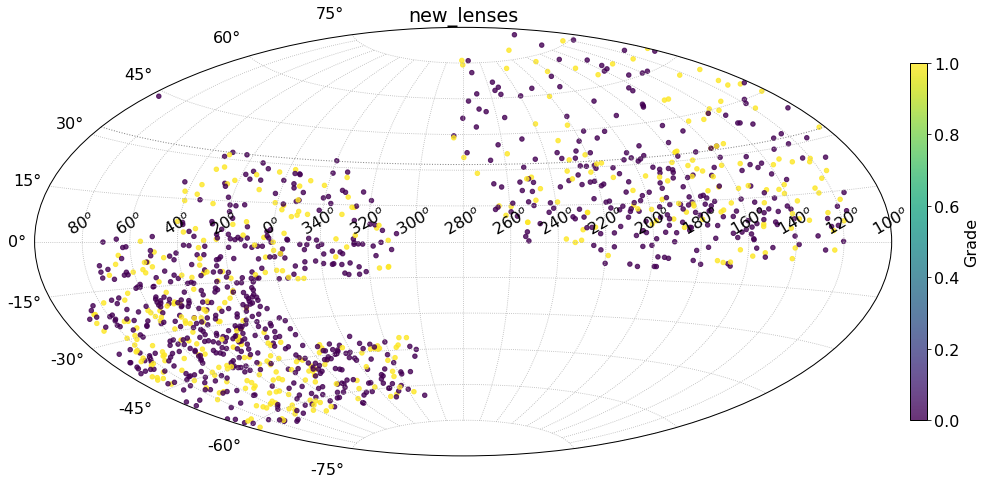

Text(0.5, 1.0, 'new_lenses')

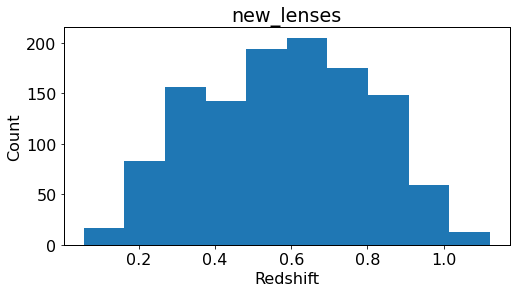

In [4]:
# plot (ra, dec) skymap colored by redshift
plt_tools.plot_skymap(df['ra'], df['dec'], df['z_phot_mean'], field_str='Redshift', title=os.path.splitext(file_in)[0])

# plot (ra, dec) skymap colored by lens grade
g = np.ones(df['grade'].shape[0])
g[df['grade'] == 'B'] = 0                        
plt_tools.plot_skymap(df['ra'], df['dec'], g, field_str='Grade', title=os.path.splitext(file_in)[0])

# Plot histogram of redshift
plt.figure(figsize=(8,4))
plt.hist(df['z_phot_mean'])
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title(os.path.splitext(file_in)[0])


# Load in lens images and plot 

### For this we need the h5py files, which do not fit on github, and must be first downloaded from the link in the README

Each of the .tsv files in <data_dir> have a corresponding h5py version hosted at NERSC. THe h5py version holds the images, which are too large for github. 

e.g. data/training_lenses.tsv has a matching data/training_lenses.h5

So we must first download them before we can examine the images.

### Download training lenses and new lens candidates (~400 MB each)

In [7]:
import wget

lens_files = glob.glob(data_dir+'*.tsv')

for f in lens_files:
    utils.get_h5py_file(f, data_host_url) 
    

h5py data file already exists at:
 data/training_lenses.h5
h5py data file already exists at:
 data/new_lenses.h5


## Take a look at training set and new lenses


Keys in training_lenses.h5 are:
-------------------------
dec: (1615,)
ebv: (1615,)
images: (1615, 3, 152, 152)
inds: (1615,)
mag_g: (1615,)
mag_r: (1615,)
mag_z: (1615,)
nobs_g: (1615,)
nobs_r: (1615,)
nobs_z: (1615,)
ra: (1615,)
representations: (1615, 2048)
source_type: (1615,)
z_phot_l68: (1615,)
z_phot_mean: (1615,)
z_phot_u68: (1615,)
z_spec: (1615,)


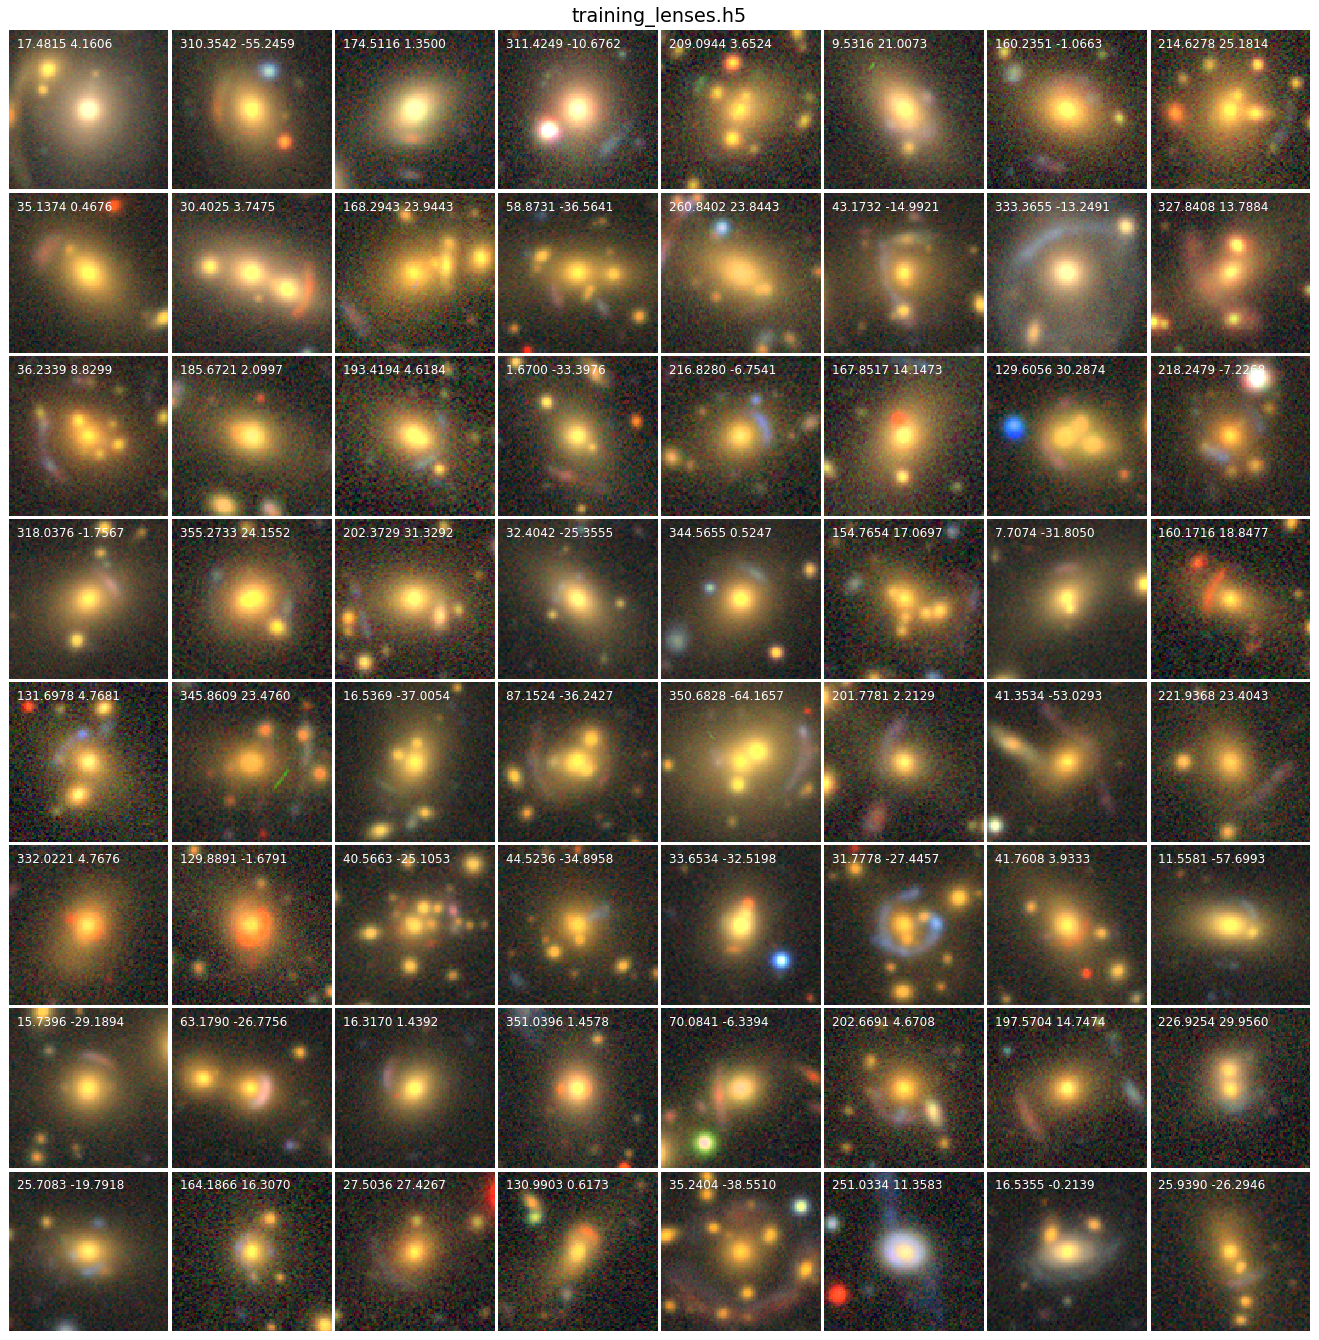

In [3]:
# Look at training lenses or new lenses

# --- set up plot configuration ---
files_in = ['training_lenses.h5', 'new_lenses.h5']

istart = 0 # index to start from
nplt = 64 # number of images to plot
nx = 8 # number of columns
npix_show = 96 # number of pixels to show. Models trained on npix=96

label_lenses = True
display_radec = True # overlay ra/dec on each image

split_grades = True # Split grade A and B, and display samples of each seperately


# --- Plot lenses for files in <files_in> --- 
for file_in in files_in:
    with h5py.File(os.path.join(data_dir, file_in), 'r') as f5:  

        print(f'\nKeys in {file_in} are:\n'+'-'*25)
        for k in f5.keys():
            print(f'{k}: {f5[k].shape}')

        
        if 'grade' in f5.keys() and split_grades:
            grades = f5['grade'][:]
            inds = np.arange(grades.shape[0])
            
            for grade in np.unique(grades):
                dm = grades == grade
                inds_grade = inds[dm]
                images = f5['images'][inds_grade[istart:istart+nplt]]
                ra     = f5['ra'][inds_grade[istart:istart+nplt]]
                dec    = f5['dec'][inds_grade[istart:istart+nplt]]

                # --- plot galaxies --- 
                plt_tools.show_galaxies(images, ra, dec, 
                                        display_radec=display_radec, 
                                        title=file_in+f': grade={grade.decode()}', 
                                        nx=nx, nplt=nplt, npix_show=npix_show)
              
        else:
            images = f5['images'][istart:istart+nplt]
            ra     = f5['ra'][istart:istart+nplt]
            dec    = f5['dec'][istart:istart+nplt]

            # --- plot galaxies --- 
            plt_tools.show_galaxies(images, ra, dec,
                                    display_radec=display_radec, 
                                    title=file_in, 
                                    nx=nx, nplt=nplt, npix_show=npix_show)


# Look at network predictions to find your own lenses!

### Will download .h5 files if you do not already have a local version.

## WARNING - each file is 27 GB

h5py data file already exists at:
 data/network_predictions/linear_predictions_south.h5
Keys in the file are:
--------------------
dec: (100000,)
ebv: (100000,)
images: (100000, 3, 152, 152)
inds: (100000,)
is_new_lens: (100000,)
is_previous_lens: (100000,)
mag_g: (100000,)
mag_r: (100000,)
mag_z: (100000,)
nobs_g: (100000,)
nobs_r: (100000,)
nobs_z: (100000,)
prediction: (100000,)
ra: (100000,)
representations: (100000, 2048)
source_type: (100000,)
z_phot_l68: (100000,)
z_phot_mean: (100000,)
z_phot_u68: (100000,)
z_spec: (100000,)


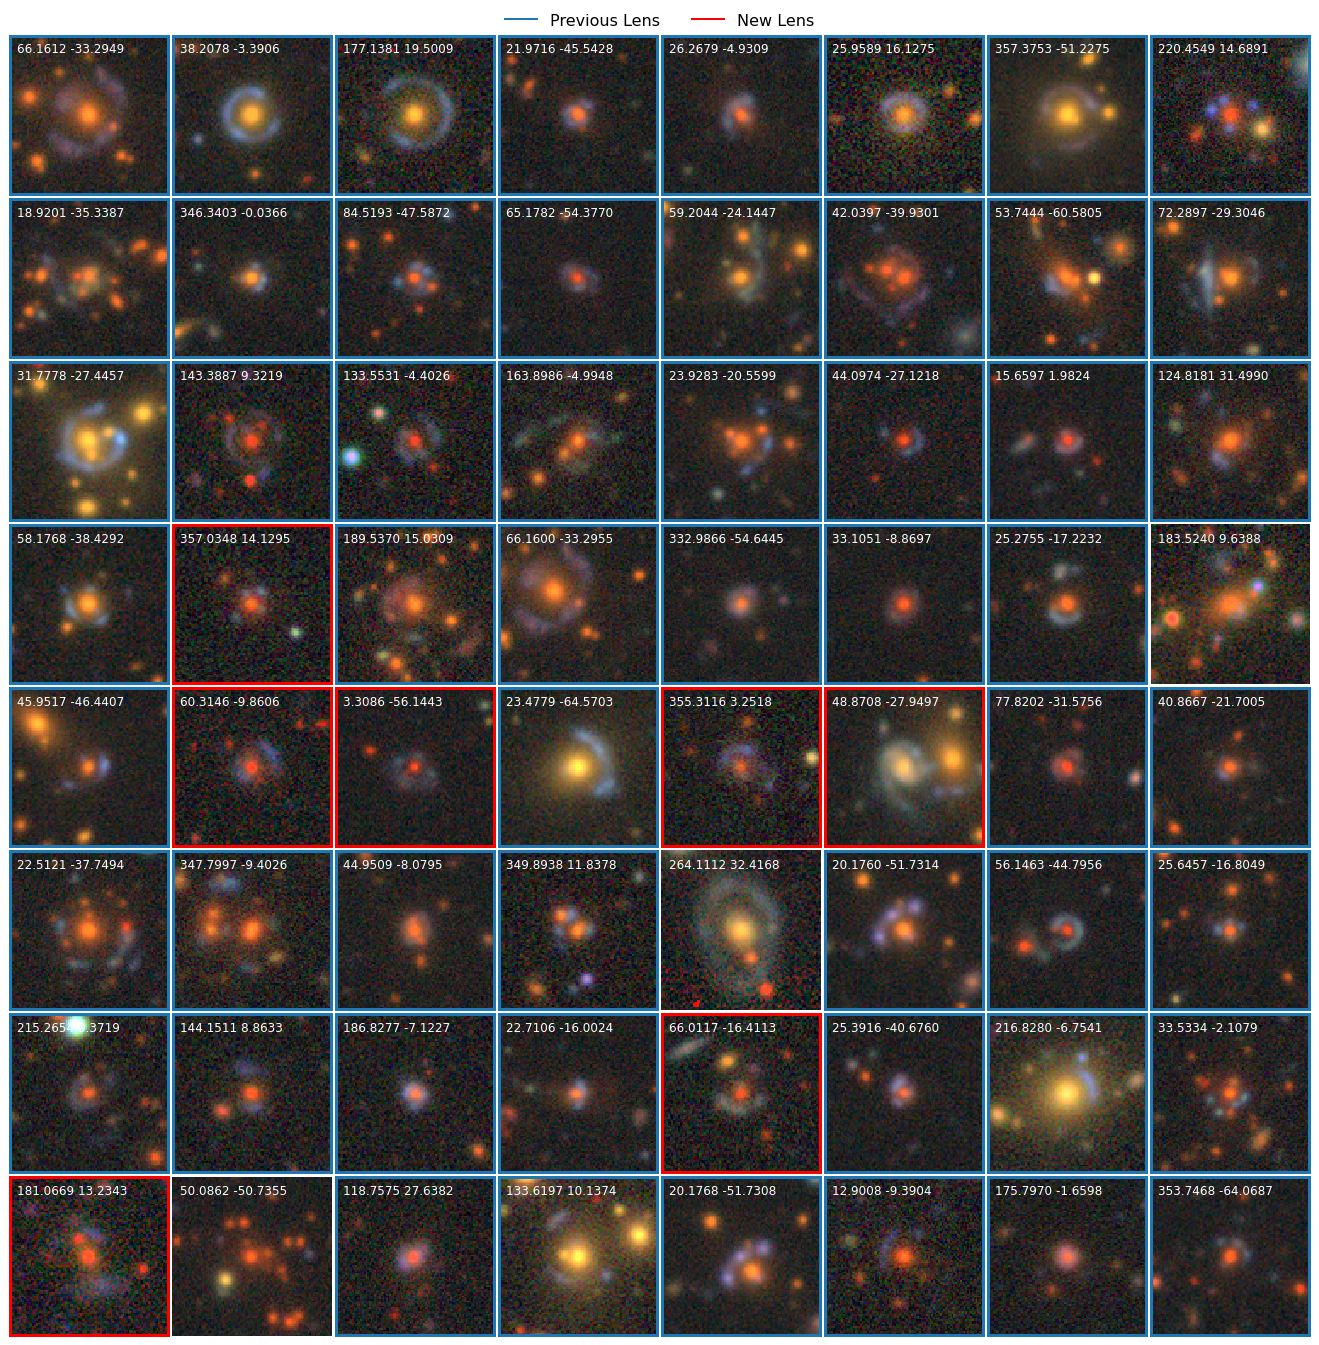

In [6]:
import wget

# --- set up plot configuration ---
survey = 'south' # 'south', 'south_mag20-21', 'north'
model = 'linear' # 'linear' or 'finetuned'

istart = 0 # index to start from
nplt = 64 # number of images to plot

nx = 8 # number of columns
npix_show = 96 # number of pixels to show. Models trained on npix=96
label_lenses = True


# --- specify data file and load fields --- 
network_prediction_dir = os.path.join(data_dir, 'network_predictions/')
file_in = f'{model}_predictions_{survey}.h5'

file_path = os.path.join(network_prediction_dir, file_in)
utils.get_h5py_file(file_path, data_host_url) 
    
with h5py.File(file_path, 'r') as f5:  
    
    print('Keys in the file are:\n'+'-'*20)
    for k in f5.keys():
        print(f'{k}: {f5[k].shape}')

    images = f5['images'][istart:istart+nplt]
    is_previous_lens = f5['is_previous_lens'][istart:istart+nplt]
    is_new_lens = f5['is_new_lens'][istart:istart+nplt]
    prediction = f5['prediction'][istart:istart+nplt]
    ra = f5['ra'][istart:istart+nplt]
    dec = f5['dec'][istart:istart+nplt]

# --- plot galaxies --- 
plt_tools.show_galaxies(images, ra, dec,
                        is_previous_lens=is_previous_lens, is_new_lens=is_new_lens, 
                        label_lenses=label_lenses,
                        nx=nx, nplt=nplt, npix_show=npix_show)
